In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts as pch
from itertools import combinations
import sympy
import scipy
from scipy import special
import warnings

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
df = pd.read_csv('datatest.csv')
df




,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,source,major,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,3,4,3,1,1,4,1,3,5,5,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,4,1,2,2,1,5,5,...,1,Nursing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,1,1,1,1,1,1,4,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,1,2,2,2,2,2,4,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,1,2,1,1,1,2,5,5,...,0,education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,1,1,1,1,1,1,1,4,3,...,2,health,science,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,1,1,1,1,1,1,1,1,1,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4,1,2,5,5,5,5,5,3,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,1,3,1,1,1,1,1,1,3,1,...,1,General,studies,NaN,NaN,NaN,NaN,NaN,NaN,NaN



## 删除不需要的特征值

In [2]:
# 按标签删除
# to_drop =df.columns[list(range(92,101))]
# to_drop = to_drop.tolist()
# df = df.drop(to_drop,axis=1)

# 按列号（索引）删除
# df.columns[list(range(92,101))]
# df = df.drop(df.columns[list(range(92,101))],axis = 1,inplace=False)

# 使用iloc，更加统一的方法
df = df.drop(df.iloc[:,92:101],axis = 1)






## 检查两份问卷填写的时间
 testelapse是填写RIASEC问卷的时间
 
 surveyelapse是填写TIPI问卷的时间



In [3]:
time = ['testelapse','surveyelapse']
df[time].describe()

,testelapse,surveyelapse
count,5000.00000,5.000000e+03
mean,497.50940,1.376414e+03
std,3617.90195,2.854917e+04
min,2.00000,3.000000e+00
25%,172.00000,1.440000e+02
50%,226.00000,1.900000e+02
75%,326.00000,2.630000e+02
max,165704.00000,1.374056e+06


 testelapse是填写RIASEC问卷的时间

 surveyelapse是填写TIPI问卷的时间

 筛选掉填写问卷过快（前5\%）和过慢（后5\%）完成的

 保留25岁到64岁的问卷


In [4]:
time = ['testelapse','surveyelapse']
print(df[time].describe())

q1 = df['testelapse'].quantile(0.05)
q2 = df['testelapse'].quantile(0.95)
print('q1 = %d, q2 = %d' % (q1,q2))

p1 = df['surveyelapse'].quantile(0.05)
p2 = df['surveyelapse'].quantile(0.95)
print('p1 = %d, p2 = %d' % (p1,p2))

mask = ((df['testelapse']>=q1) & (df['testelapse']<=q2) & (df['surveyelapse']>=p1) & (df['surveyelapse']<=p2) \
        & (df['age']>=25) & (df['age']<65) & (df['gender']>=1) & (df['gender']<=2) )
df = df[mask]


         testelapse  surveyelapse
count    5000.00000  5.000000e+03
mean      497.50940  1.376414e+03
std      3617.90195  2.854917e+04
min         2.00000  3.000000e+00
25%       172.00000  1.440000e+02
50%       226.00000  1.900000e+02
75%       326.00000  2.630000e+02
max    165704.00000  1.374056e+06
q1 = 119, q2 = 835
p1 = 100, p2 = 540



删除VCL6、VCL6、VCL6为1的问卷

删除VCL1、VCL4、VCL10为0的问卷

删除country信息缺失的问卷


In [5]:
dfClean = df[(df['VCL6']!=1) & (df['VCL9']!=1) & (df['VCL11']!=1)\
                 &(df['VCL1']!=0)&(df['VCL4']!=0)&(df['VCL10']!=0)\
                    &(df['country'] != 'NONE')]
# 其实和mask是一样的操作，只是上面的做法引入了mask这个布尔序列
dfClean['gender'] = dfClean['gender'].apply(lambda x: 'male' if x == 1 else 'female')

dfClean


,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,hand,religion,orientation,race,voted,married,familysize,uniqueNetworkLocation,country,source
1,1,1,2,4,1,2,2,1,5,5,...,1,7,3,4,1,2,3,1,US,1
18,3,4,4,5,3,5,4,4,5,5,...,1,7,1,5,2,3,2,1,US,0
22,3,1,1,1,1,1,1,1,1,2,...,1,4,0,4,2,2,3,1,US,1
27,3,1,1,1,1,1,1,1,3,3,...,1,4,1,4,1,1,1,1,PT,0
34,3,1,2,2,2,2,2,2,4,2,...,1,1,3,4,1,1,4,1,US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,3,4,1,5,2,2,2,2,4,4,...,1,10,0,1,2,2,3,1,NL,0
4986,3,1,2,1,1,1,1,1,4,1,...,1,4,1,4,2,1,2,1,PT,0
4992,4,4,1,4,2,3,2,3,2,4,...,1,7,1,4,1,2,1,2,RO,0
4998,1,3,1,1,1,1,1,1,3,1,...,1,9,1,4,1,2,4,2,US,1



(现在得到的是问卷中测试题目选择正确，问卷用时合适，年龄合适 的被试)

求每个被试在RIASEC量表上每个维度的总分


In [6]:
dfClean['R']=dfClean.iloc[:,  0:8].sum(axis = 1)
dfClean['I']=dfClean.iloc[:, 8:16].sum(axis = 1)
dfClean['A']=dfClean.iloc[:,16:24].sum(axis = 1)
dfClean['S']=dfClean.iloc[:,24:32].sum(axis = 1)
dfClean['E']=dfClean.iloc[:,32:40].sum(axis = 1)
dfClean['C']=dfClean.iloc[:,40:48].sum(axis = 1)
dfClean['TIPI']=dfClean.iloc[:,51:61].sum(axis = 1)
dfClean

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,uniqueNetworkLocation,country,source,R,I,A,S,E,C,TIPI
1,1,1,2,4,1,2,2,1,5,5,...,1,US,1,14,35,19,22,10,10,51
18,3,4,4,5,3,5,4,4,5,5,...,1,US,0,32,37,32,35,34,32,47
22,3,1,1,1,1,1,1,1,1,2,...,1,US,1,10,9,13,26,9,8,48
27,3,1,1,1,1,1,1,1,3,3,...,1,PT,0,10,20,26,38,38,28,42
34,3,1,2,2,2,2,2,2,4,2,...,1,US,1,16,19,23,26,22,23,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,3,4,1,5,2,2,2,2,4,4,...,1,NL,0,21,31,25,26,15,27,49
4986,3,1,2,1,1,1,1,1,4,1,...,1,PT,0,11,14,8,30,21,26,51
4992,4,4,1,4,2,3,2,3,2,4,...,2,RO,0,23,17,14,20,17,12,38
4998,1,3,1,1,1,1,1,1,3,1,...,2,US,1,10,14,25,10,22,8,39


对年龄进行分组（10到14，15到19...）

并计算每一年龄段RIASEC/TIPI的量表得分信息

同样计算男女性


In [7]:
# 下面这一段十分重要，掌握，掌握

bins = np.arange(25, dfClean['age'].max() + 5, 5)
# print(bins)
# [25 30 35 40 45 50 55 60 65]

# 使用cut函数将被试按照每五岁进行分组
dfClean['agegroup'] = pd.cut(dfClean['age'], bins, right=False)

ageGroup = dfClean.groupby('agegroup')

result_age = ageGroup.agg({
    'R':['mean','std'],
    'I':['mean','std'],
    'A':['mean','std'],
    'S':['mean','std'],
    'E':['mean','std'],
    'C':['mean','std'],
    'TIPI':['mean','std']
})
result_age
# result_age 是一个可以用iloc的dataframe

R                    I                    A            \
               mean       std       mean       std       mean       std   
agegroup                                                                  
[25, 30)  16.320611  6.661800  24.847328  7.951455  23.221374  7.532092   
[30, 35)  17.707071  7.541092  24.161616  7.494441  24.212121  7.641422   
[35, 40)  15.771186  6.627334  24.042373  8.294158  22.847458  8.078278   
[40, 45)  16.436893  6.850891  23.834951  7.949716  23.543689  7.693614   
[45, 50)  15.728972  6.686469  22.242991  9.284641  21.626168  7.900947   
[50, 55)  17.042254  6.964064  23.957746  7.021267  22.774648  6.363281   
[55, 60)  13.909091  5.429541  22.795455  9.490704  22.022727  8.004326   
[60, 65)  17.210526  7.012520  23.947368  8.790612  22.368421  6.237971   

                  S                    E                    C            \
               mean       std       mean       std       mean       std   
agegroup                                                                  
[25, 30)  26.912214  6.745221  19.694656  6.737433  19.530534  7.994552   
[30, 35)  27.106061  7.204332  20.651515  6.957797  19.777778  7.573740   
[35, 40)  26.618644  7.064924  19.483051  6.578563  19.084746  7.273152   
[40, 45)  26.699029  7.377543  20.067961  7.463982  18.368932  7.790127   
[45, 50)  27.439252  7.001587  19.822430  6.915682  19.551402  8.794546   
[50, 55)  27.661972  6.256297  19.661972  7.105217  20.154930  7.682351   
[55, 60)  26.136364  8.281644  17.750000  6.881472  18.159091  7.658232   
[60, 65)  27.789474  4.157710  19.526316  4.992978  17.578947  7.946458   

               TIPI            
               mean       std  
agegroup                       
[25, 30)  44.916031  4.385693  
[30, 35)  44.560606  4.483910  
[35, 40)  44.669492  4.830556  
[40, 45)  44.009709  4.945775  
[45, 50)  44.813084  4.298159  
[50, 55)  44.154930  3.774531  
[55, 60)  43.750000  3.531420  
[60, 65)  42.789474  4.237124

计算所有男性(gender = 1)和女性(gender = 2)的TIPI、RIASEC量表的总分的平均分

In [8]:



genderGroup = dfClean.groupby('gender')

result_gender = genderGroup.agg({
    'R':['mean','std'],
    'I':['mean','std'],
    'A':['mean','std'],
    'S':['mean','std'],
    'E':['mean','std'],
    'C':['mean','std'],
    'TIPI':['mean','std']
})

result_gender

R                    I                    A            \
             mean       std       mean       std       mean       std   
gender                                                                  
female  14.672297  6.118185  23.298986  8.053131  22.964527  7.650825   
male    19.642424  7.058119  25.248485  8.059736  23.421212  7.565007   

                S                    E                    C            \
             mean       std       mean       std       mean       std   
gender                                                                  
female  28.013514  6.599222  19.875000  6.911423  19.233108  7.929664   
male    25.160606  7.262446  19.751515  6.827805  19.536364  7.697168   

             TIPI            
             mean       std  
gender                       
female  44.721284  4.380585  
male    44.206061  4.544942


分别计算RIASEC之间的相关

RIASEC各维度与年龄的相关

RIASEC与TIPI的相关

TIPI和年龄的相关


In [9]:

# corr_matrix = dfClean.iloc[:,92:98].corr()
corr_RIASEC = dfClean.iloc[:,92:98].apply(lambda x: dfClean.iloc[:,92:98].apply(lambda y:scipy.stats.pearsonr(x, y)[0]))
print('RIASEC各维度间的相关')
print(corr_RIASEC)
print()

p_RIASEC = dfClean.iloc[:,92:98].apply(lambda x: dfClean.iloc[:,92:98].apply(lambda y:scipy.stats.pearsonr(x, y)[1]))
print('RIASEC各维度间的显著性差异')
print(p_RIASEC)
print()

print('各维度之间没有显著性相关 :-( ')

RIASEC各维度间的相关
          R         I         A         S         E         C
R  1.000000  0.312304  0.197812  0.016649  0.315363  0.455030
I  0.312304  1.000000  0.347545  0.134313  0.049907  0.050463
A  0.197812  0.347545  1.000000  0.324410  0.296334 -0.010161
S  0.016649  0.134313  0.324410  1.000000  0.353840  0.159324
E  0.315363  0.049907  0.296334  0.353840  1.000000  0.477321
C  0.455030  0.050463 -0.010161  0.159324  0.477321  1.000000

RIASEC各维度间的显著性差异
              R             I             A             S             E  \
R  0.000000e+00  2.625916e-22  1.376089e-09  6.136460e-01  9.766140e-23   
I  2.625916e-22  0.000000e+00  1.441160e-27  4.288665e-05  1.299498e-01   
A  1.376089e-09  1.441160e-27  0.000000e+00  4.893048e-24  3.817289e-20   
S  6.136460e-01  4.288665e-05  4.893048e-24  0.000000e+00  1.397164e-28   
E  9.766140e-23  1.299498e-01  3.817289e-20  1.397164e-28  0.000000e+00   
C  2.586186e-48  1.257228e-01  7.579957e-01  1.160185e-06  1.219321e-53   

        

In [10]:
# index = 'RIASEC'
# for i in index:
#     print(dfClean[[i,'age']].corr(method = 'spearman'))
corr_RIASEC_age = dfClean.iloc[:,92:98].apply(lambda x: scipy.stats.spearmanr(x,dfClean['age'])[0])
print('corr_RIASEC_age')
print(corr_RIASEC_age)
print()

p_RIASEC_age = dfClean.iloc[:,92:98].apply(lambda x: scipy.stats.spearmanr(x,dfClean['age'])[1])
print('p_RIASEC_age')
print(p_RIASEC_age)
print()


print('\n各维度和年龄的增长之间,没有什么有意义的相关（虽然有一个显著的负相关）')


corr_RIASEC_age
R   -0.029592
I   -0.068713
A   -0.058671
S    0.007426
E   -0.042397
C   -0.035199
dtype: float64

p_RIASEC_age
R    0.369447
I    0.036972
A    0.074972
S    0.821841
E    0.198372
C    0.285667
dtype: float64


各维度和年龄的增长之间,没有什么有意义的相关（虽然有一个显著的负相关）


In [11]:
corr_RIASEC_TIPI = dfClean.iloc[:,92:98].apply(lambda x: scipy.stats.pearsonr(x,dfClean['TIPI'])[0])
print('corr_RIASEC_TIPI')
print(corr_RIASEC_TIPI)
print()

p_RIASEC_TIPI = dfClean.iloc[:,92:98].apply(lambda x: scipy.stats.pearsonr(x,dfClean['TIPI'])[1])
print('p_RIASEC_TIPI')
print(p_RIASEC_TIPI)
print()

corr_RIASEC_TIPI
R    0.061630
I    0.072868
A   -0.028259
S    0.208474
E    0.118265
C    0.099715
dtype: float64

p_RIASEC_TIPI
R    6.140246e-02
I    2.692999e-02
A    3.914085e-01
S    1.637650e-10
E    3.196795e-04
C    2.435479e-03
dtype: float64



In [12]:
TIPI_age = scipy.stats.spearmanr(dfClean['TIPI'],dfClean['age'])
print('TIPI_age')
print(TIPI_age)
print('TIPI和年龄无相关')
R = pd.concat([dfClean['gender'],dfClean.iloc[:,92:99]],axis=1)
pd.DataFrame.to_csv(R,'dataframe.csv')


TIPI_age
SignificanceResult(statistic=-0.08642004147431809, pvalue=0.008653436407620974)
TIPI和年龄无相关


### 注意到S和TIPI的正相关是显著的(statistic = 0.209623,p = 1.234765e-10)
    但是不画这个 嘿嘿
### fig1 各国家参加填写问卷的年龄信息(小提琴图)
### fig2 S和TIPI的六边形图
### fig3 R和TIPI的关系，并标注年龄和性别信息
### fig4 RIASEC 和TIPI 随年龄的折线图

In [13]:

import seaborn as sns

Text(0.5, 1.0, 'age in country')

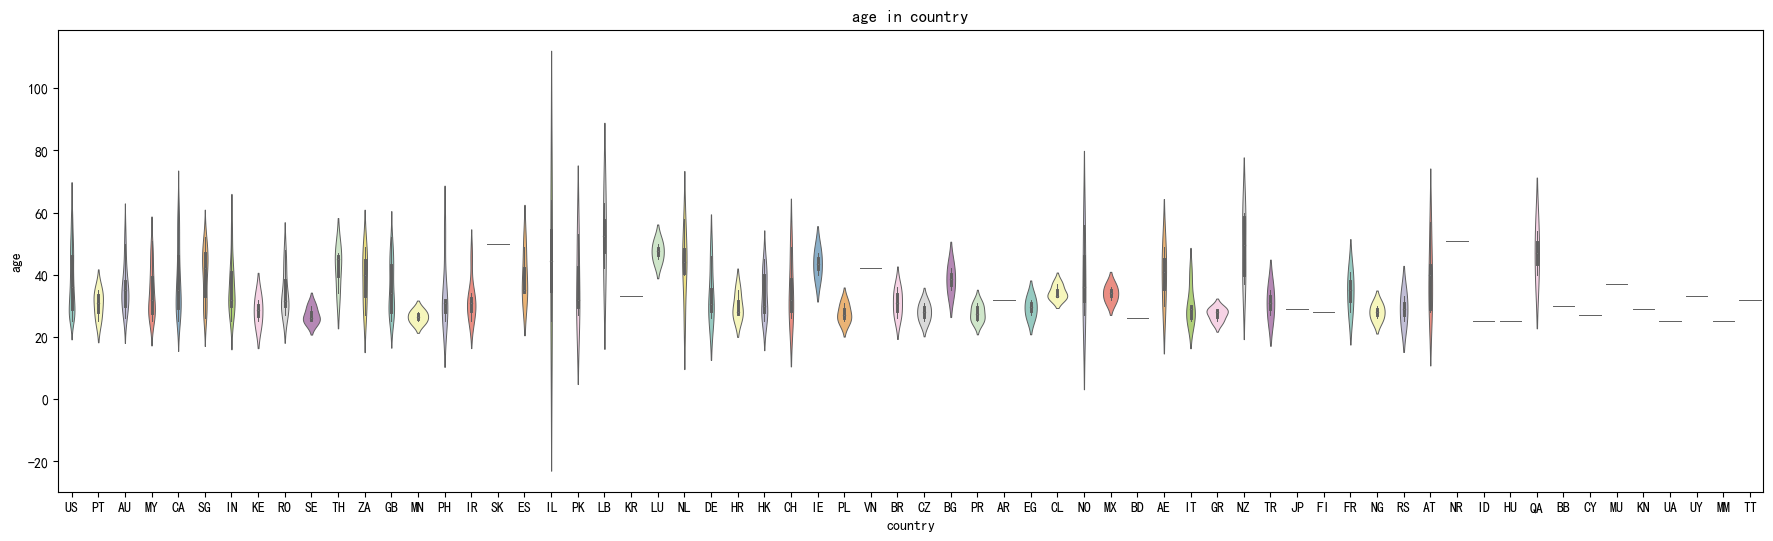

In [14]:
plt.figure(figsize=(22,6))
#fig1 = sns.boxplot(y = dfClean['age'],x = dfClean['country'],data=dfClean,) 箱图
fig1 = sns.violinplot(y = dfClean['age'],x = dfClean['country'], bw_adjust=.5, cut=2, linewidth=0.7, palette="Set3",inner = 'box')
fig1.set_title('age in country')

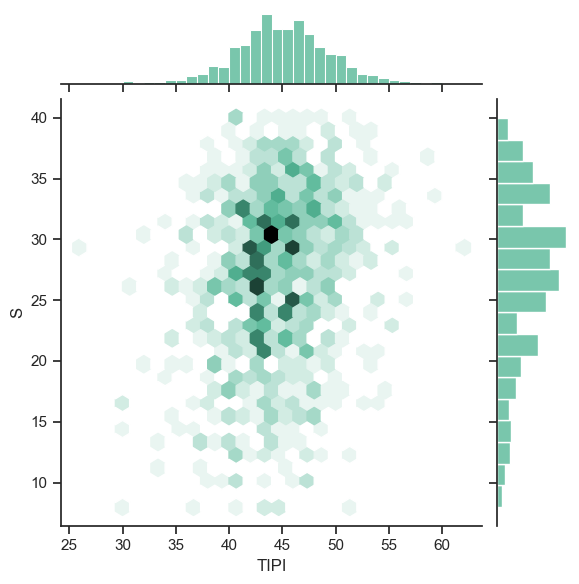

In [15]:
sns.set_theme(style="ticks")
fig2 = sns.jointplot(x=dfClean['TIPI'], y=dfClean['S'], kind="hex", color="#4CB391")


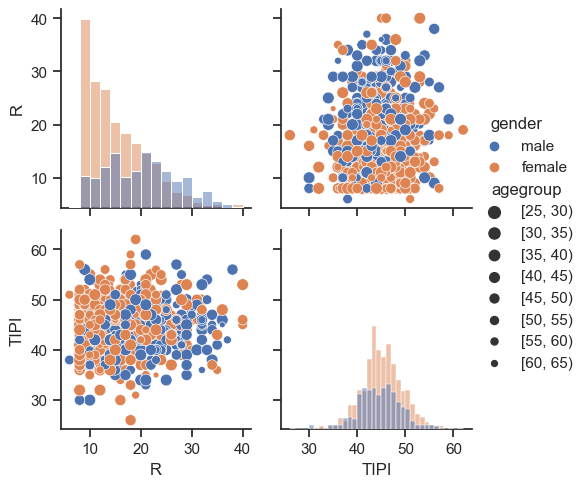

In [16]:
sns.set_theme(style="ticks")
dat = dfClean[['R','TIPI','gender','agegroup']]
fig3 = sns.PairGrid(dat,hue='gender')
# fig3 = sns.PairGrid(dfClean,x_vars=  ['R','TIPI'],y_vars= ['R','TIPI'],hue='gender')
fig3.map_diag(sns.histplot)
fig3.map_offdiag(sns.scatterplot, size=dat['agegroup'])
fig3.add_legend(title="", adjust_subtitles=True)


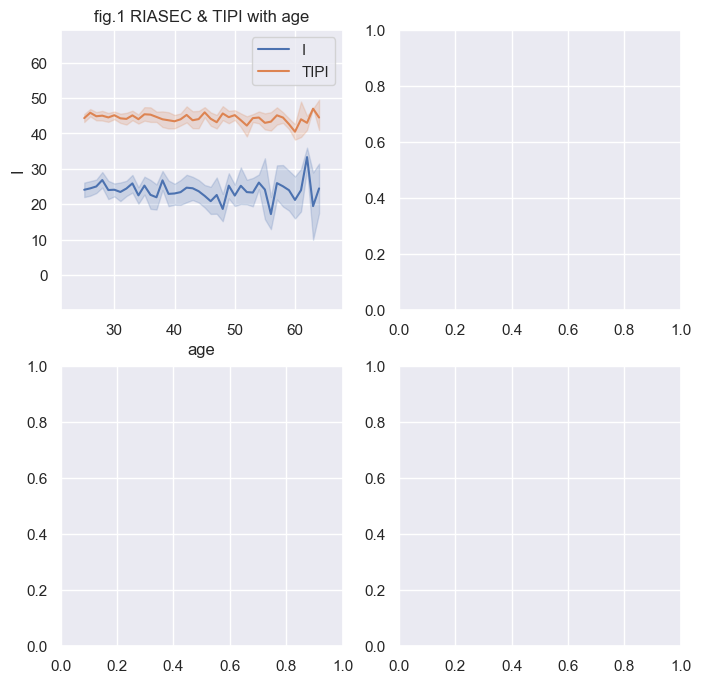

In [17]:
# sns.set_theme(style="ticks")

sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(2,2,figsize=(8,8))
fig4 = sns.lineplot(x=dfClean['age'], y=dfClean['I'],label = 'I',ax=axes[0,0])
# sns.lineplot(x=dfClean['age'], y=dfClean['A'],label = 'A')
# sns.lineplot(x=dfClean['age'], y=dfClean['R'],label = 'R')
# sns.lineplot(x=dfClean['age'], y=dfClean['S'],label = 'S')
# sns.lineplot(x=dfClean['age'], y=dfClean['E'],label = 'E')
# sns.lineplot(x=dfClean['age'], y=dfClean['C'],label = 'C')
fig4 = sns.lineplot(x=dfClean['age'], y=dfClean['TIPI'],label = 'TIPI',ax=axes[0,0])
fig4.set_title('fig.1 RIASEC & TIPI with age')
fig4.margins(x = 0.1,y = 0.5)




<Axes: xlabel='agegroup', ylabel='count'>

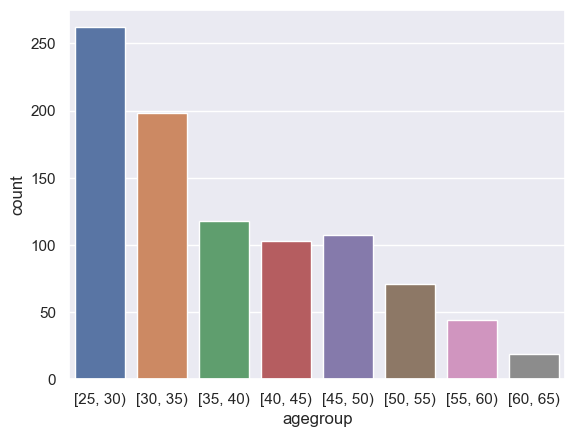

In [18]:
sns.countplot(x = dfClean['agegroup'])

In [19]:
dfClean.iloc[5,6]

1